In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sci
import qutip as qt
from qutip import (Qobj, about, basis, coherent, coherent_dm, create, destroy,
                   expect, fock, fock_dm, mesolve, qeye, sigmax, sigmay,
                   sigmaz, tensor, thermal_dm)
import lattpy as lp
from scipy.optimize import curve_fit
from scipy.linalg import expm
from scipy.linalg import eigvals

from IPython.display import clear_output
from matplotlib.animation import FuncAnimation
from IPython import display
import os
import matplotlib as mpl

In [2]:
""" variables """
N=11
gamma0 = 1
lambda0= 2*np.pi 
distance=lambda0/8 
k0=1 
d_value=1 


""" atoms in a line with constant distance"""
atoms = np.zeros((N, 3))

for i in range(N):
    atoms[i, 2] = i * distance*k0
r = [atoms[i] for i in range(N)]
r_T = [i.reshape(-1, 1) for i in r]

d=np.array([0,d_value,0])
d_abs=np.linalg.norm(d)
d = d.reshape(-1, 1)
d_T=d.reshape(1, -1)


def G0(rij,k0): 
    r0=np.linalg.norm(rij)
    rij_T = rij.reshape(-1, 1)
    return ((3*np.pi*k0*np.exp(1j*k0*r0))/(4*np.pi*(k0*r0)**3))*((k0**2*r0**2+1j*k0*r0-1)*np.identity(3)+((-k0**2*r0**2-3j*k0*r0+3)*(np.dot(rij,rij_T)/r0**2)))


def H_eff(r,d,N):
    Matrix = np.zeros((N,N), dtype=complex)
    k0=1
    for i in range(N):
        for j in range(N):
            if i == j:
                Matrix[i, j] += -1j*gamma0/2
            else:
                rij = r[i] - r[j]
                Matrix[i, j] += -np.dot(d_T, np.dot(G0(rij,k0), d))
    return  Matrix

Hamiltonian=H_eff(r,  d, N)

""" real and imaginary part of H_eff """

H_eff_real=np.real(H_eff(r,  d, N))
H_eff_imag=np.imag(H_eff(r,  d, N))


H_eff_eigenvalues=np.linalg.eigvals(H_eff(r,  d, N))
H_eff_imag_eigenvalues=np.imag(np.linalg.eigvals(H_eff(r,  d, N)))

H_eff_eigenvalues_sorted=np.sort(H_eff_eigenvalues)
H_eff_imag_eigenvalues_sorted=np.sort(H_eff_imag_eigenvalues)

In [ ]:
"""Overlap subradient state"""
plt.rcParams['font.family'] = 'serif'
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

dt = 5 #time step
T = 5000 #evolution time


""" initial state """
eigenvalues_0, eigenvectors_0 = np.linalg.eig(H_eff(r, d, N))
index = np.argmax(np.imag(eigenvalues_0))
psi_0 = eigenvectors_0[:, index] 
psi_0 = psi_0 / np.linalg.norm(psi_0)



overlap_list = []

"""time evolution"""
for t in np.arange(0, T, dt):
    psi_t = expm(-1j * Hamiltonian * t) @ psi_0
    overlap = np.abs(np.vdot(psi_0, psi_t))**2
    overlap_list.append(overlap)

"""Plot"""
plt.figure(figsize=(8, 3))
plt.plot(np.arange(0, T, dt), overlap_list,color='blue')
plt.grid(True)
plt.title(r'\textbf{Probability of the overlap between the initial and the time-evolved state}', fontsize=16)
plt.xlabel(r'Time t', fontsize=16)
plt.ylabel(r'$\mathbf{|\langle \psi_0 | \psi_t \rangle|^2}$', fontsize=16)
plt.ylim([0, 1]) 
plt.xlim([0, T]) 
plt.show()

In [ ]:

"""initial state, excitation in the middel atom"""
psi_0 = np.zeros((N,), dtype=complex)
mid_index = N // 2
psi_0[mid_index] = 1  


dt = 0.01
T = 750  
time = np.arange(0, T, dt)
population = []

"""time evolution"""
for t in time:
    psi_t= expm(-1j * Hamiltonian * t) @ psi_0
    population.append(np.sum(np.abs(psi_t)**2)) 

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=False)

index50 = int(50 / dt)
index500 = int(750 / dt)

ax1.plot(time[:index50], population[:index50],color='blue')
ax1.set_xlim(0, 50)
ax1.set_xlabel(r'Time t',fontsize=16)
ax1.set_ylabel(r'$|\langle \psi_t | \psi_t \rangle|^2$', fontsize=16)
ax1.set_title(r'Total Population Dynamics of the System (T=0-50)')

ax1.grid(True)

ax2.plot(time[index50:index500], population[index50:index500],color='blue')
ax2.set_xlim(50, 750)
ax2.set_xlabel(r'Time t',fontsize=16)
ax2.set_ylabel(r'$|\langle \psi_t | \psi_t \rangle|^2$', fontsize=16)
ax2.set_title(r'Total Population Dynamics of the System (T=50-750)')


plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
"""initial state, excitation in the first atom"""
psi_0 = np.zeros((N,), dtype=complex)
mid_index = 0
psi_0[mid_index] = 1 

dt = 0.01
T = 750 
time_points = np.arange(0, T, dt)
population = []

"""time evolution"""
for t in time_points:
    psi_t= expm(-1j * Hamiltonian * t) @ psi_0
    population.append(np.sum(np.abs(psi_t)**2)) 

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=False)

index50 = int(50 / dt)
index500 = int(750 / dt)

ax1.plot(time_points[:index50], population[:index50],color='blue')
ax1.set_xlim(0, 50)
ax1.set_xlabel(r'Time t',fontsize=16)
ax1.set_ylabel(r'$|\langle \psi_t | \psi_t \rangle|^2$', fontsize=16)
ax1.set_title(r'Total Population Dynamics of the System (T=0-50)')
ax1.axvline(x=0.8, color='black', linestyle='--', linewidth=1)
ax1.axvline(x=1.4, color='black', linestyle='--', linewidth=1)
ax1.grid(True)

ax2.plot(time_points[index50:index500], population[index50:index500],color='blue')
ax2.set_xlim(50, 750)
ax2.set_xlabel(r'Time t',fontsize=16)
ax2.set_ylabel(r'$|\langle \psi_t | \psi_t \rangle|^2$', fontsize=16)
ax2.set_title(r'Total Population Dynamics of the System (T=50-750)')

plt.grid(True)

plt.tight_layout()
plt.show()

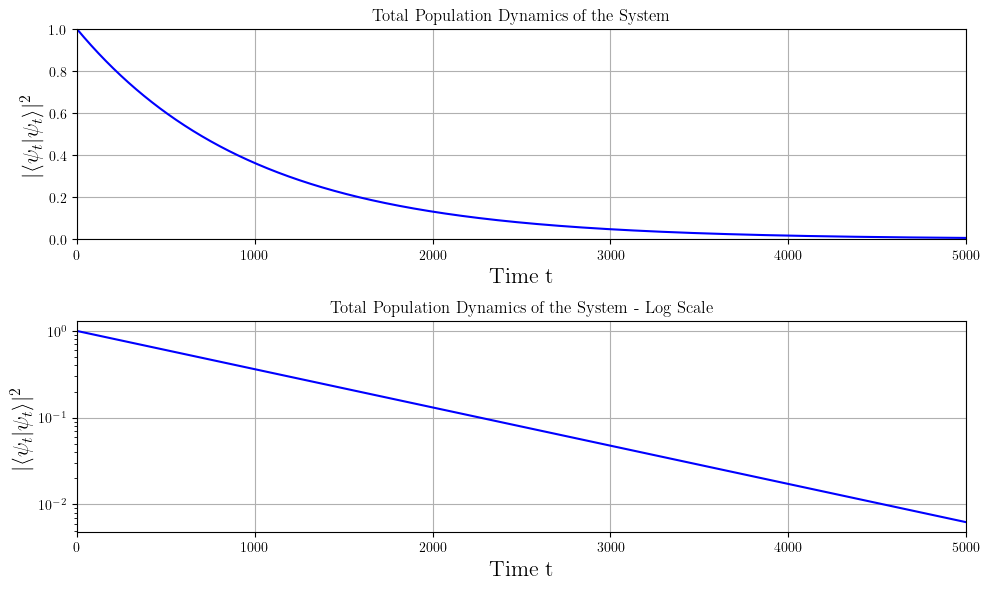

In [6]:
"""initial state, excitation in the most subradiant state"""
eigenvalues_0, eigenvectors_0 = np.linalg.eig(Hamiltonian)
index = np.argmax(np.imag(eigenvalues_0))
psi_0 = eigenvectors_0[:, index]
psi_0 = psi_0 / np.linalg.norm(psi_0)

population = []

dt = 0.01
T = 5000
time = np.arange(0, T, dt)
time_0 = 0

"""time evolution"""
for t in time:
    psi_t = expm(-1j * Hamiltonian * t) @ psi_0
    population.append(np.sum(np.abs(psi_t)**2))

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))

ax1.plot(time, population, label='Total Population',color='blue')
ax1.set_xlabel(r'Time t',fontsize=16)
ax1.set_ylabel(r'$|\langle \psi_t | \psi_t \rangle|^2$', fontsize=16)
ax1.set_title('Total Population Dynamics of the System')
ax1.grid(True)
ax1.set_xlim([0, T])
ax1.set_ylim([0, 1])


ax2.plot(time, population, label='Total Population', color='blue')
ax2.set_xlabel(r'Time t', fontsize=16)
ax2.set_ylabel(r'$|\langle \psi_t | \psi_t \rangle|^2$', fontsize=16)
ax2.set_title(r'Total Population Dynamics of the System - Log Scale')
ax2.grid(True)
ax2.set_xlim([0, T])
ax2.set_yscale('log')

fig.tight_layout()

plt.show()

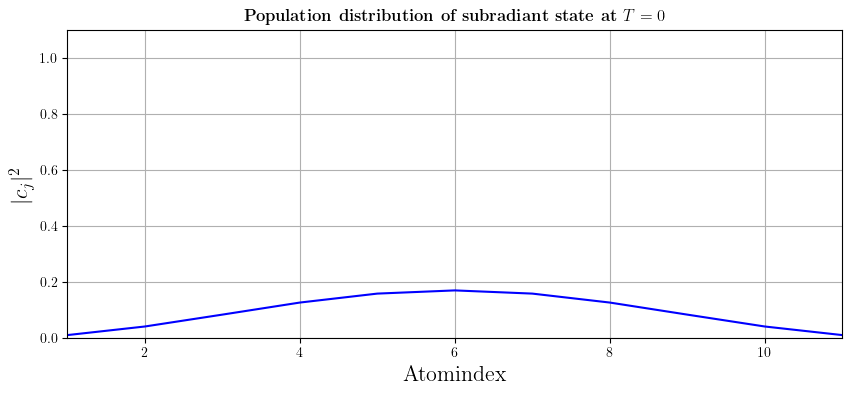

In [7]:

dt = 0.1
T = 1
time = np.arange(0, T, dt)
population = []

for t in time:
    psi_t = expm(-1j * Hamiltonian * t) @ psi_0
    population.append(np.abs(psi_t)**2)

plt.figure(figsize=(10, 4))
plt.title(r'\textbf{Population distribution of subradiant state at $T=0$}')
plt.xlabel(r'Atomindex', fontsize=16)
plt.ylabel(r'$|c_{j}|^{2}$', fontsize=16)

plt.plot(np.arange(1, N+1), np.abs(psi_0)**2, color='blue')
plt.ylim(0, 1.1)
plt.xlim(1, N)
plt.grid(True)
plt.show()